# Rain gauge data info
This notebook extracts information about each rain gauge location from the data filenames.

In [1]:
import pandas as pd
import numpy as np
import os

from pyresample import load_area, geometry

In [2]:
f = open('../path_to_data.txt', "r") # File specifying location of data storage
path_to_dataset = os.path.join(f.readline().rstrip("\n"))
f.close() 

In [3]:
dataloc = os.path.join(path_to_dataset, 'real_rain_gauge_data', 'csv_formatado/') # Path to rain gauge data
filename_list = os.listdir(dataloc)
print('Number of rain gauge files', len(filename_list))

Number of rain gauge files 609


In [4]:
filename_list.sort()

In [5]:
filename_list

['AC_A102_187_W69.92722221_S9.3575.csv',
 'AC_A104_220_W68.165_S9.95777777.csv',
 'AC_A108_220_W72.405_S7.61055555.csv',
 'AC_A136_204_W72.74777777_S8.26694443.csv',
 'AC_A137_230_W72.78666666_S8.95.csv',
 'AC_A138_163_W70.57527777_S8.24194444.csv',
 'AC_A140_217_W68.73499999_S11.0236111.csv',
 'AL_A303_80_W35.77027777_S9.55111111.csv',
 'AL_A323_19_W37.44777777_S9.76583333.csv',
 'AL_A327_275_W36.62027777_S9.42055554.csv',
 'AL_A353_241_W36.61888888_S9.80416666.csv',
 'AL_A355_74_W36.28638888_S10.14527777.csv',
 'AL_A356_19_W35.56583333_S9.28749999.csv',
 'AL_A371_187_W37.76722221_S9.62222221.csv',
 'AM_A101_61.25_W60.01638888_S3.10333333.csv',
 'AM_A109_143_W69.86694443_S6.65027777.csv',
 'AM_A110_111_W67.33222221_S8.77666666.csv',
 'AM_A111_64_W64.7886111_S7.43527777.csv',
 'AM_A112_72_W63.12138888_S7.92277777.csv',
 'AM_A113_160_W59.8886111_S7.21527777.csv',
 'AM_A117_53_W63.14527777_S4.09749999.csv',
 'AM_A119_55_W60.62833332_S3.29472221.csv',
 'AM_A120_78_W60.02555554_S2.05638888

In [6]:
# States to region mapping 
states_regions = {'AC': 'N', 'AL': 'NE', 'AP': 'N', 'AM': 'N', 'BA': 'NE', 'CE':'NE', 'DF':'CW', 'ES':'SE' , 'GO': 'CW', 'MA':'NE', 'MT':'CW', 'MS':'CW', 'MG':'SE', 'PA':'N', 'PB':'NE', 'PR':'S', 'PE': 'NE', 'PI':'NE', 'RJ':'SE', 'RN':'NE', 'RS':'S', 'RO':'N', 'RR':'N', 'SC':'S', 'SP':'SE', 'SE':'NE', 'TO':'N'  }

In [7]:
# Function to extract lon, lat and state region from rain gauge data filename
def extractInfoFromFilename(filename):
    state = filename[:2]
    region = states_regions[state]
    lonlat = filename.split("W")[1][:-4].split("_S")
    lon = -float(lonlat[0])
    lat = -float(lonlat[1])
    return((filename, lon, lat, state, region))

In [8]:
# Create dataframe 
I = []
for filename in filename_list:
    info = extractInfoFromFilename(filename)
    I.append(info)
    
df = pd.DataFrame(I, columns = ['filename', 'lon', 'lat', 'state', 'region'])

In [9]:
df

,filename,lon,lat,state,region
0,AC_A102_187_W69.92722221_S9.3575.csv,-69.927222,-9.357500,AC,N
1,AC_A104_220_W68.165_S9.95777777.csv,-68.165000,-9.957778,AC,N
2,AC_A108_220_W72.405_S7.61055555.csv,-72.405000,-7.610556,AC,N
3,AC_A136_204_W72.74777777_S8.26694443.csv,-72.747778,-8.266944,AC,N
4,AC_A137_230_W72.78666666_S8.95.csv,-72.786667,-8.950000,AC,N
...,...,...,...,...,...
604,TO_A051_161_W49.62944443_S10.47694443.csv,-49.629444,-10.476944,TO,N
605,TO_A052_306_W48.18555555_S11.04638888.csv,-48.185556,-11.046389,TO,N
606,TO_A053_512_W47.21222222_S11.28416666.csv,-47.212222,-11.284167,TO,N
607,TO_A054_231_W49.5286111_S12.59222221.csv,-49.528611,-12.592222,TO,N


In [10]:
# Extract col row location in predictions grid corresponding to lat, lon position
area_path='../dataset/downloads/files/areas.yaml'
area_def = load_area(area_path, 'full_disk')

def get_gauge_locations(locs):
    colrows = []
    for lon, lat in zip(locs['lon'], locs['lat']):
        col, row = area_def.lonlat2colrow(lon, lat) #columns and rows in area_def grid coords 
        colrows.append((col, row))

    locs['col'] = np.array(colrows)[:,0]
    locs['row'] = np.array(colrows)[:,1]
    return(locs)

In [11]:
df_w_gauge_locs = get_gauge_locations(df)

/export/home/ingrid/anaconda3/envs/geo/lib/python3.8/site-packages/pyproj/crs/crs.py:543: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  proj_string = self.to_proj4()


In [12]:
df_w_gauge_locs

,filename,lon,lat,state,region,col,row
0,AC_A102_187_W69.92722221_S9.3575.csv,-69.927222,-9.357500,AC,N,1494,1612
1,AC_A104_220_W68.165_S9.95777777.csv,-68.165000,-9.957778,AC,N,1541,1628
2,AC_A108_220_W72.405_S7.61055555.csv,-72.405000,-7.610556,AC,N,1427,1564
3,AC_A136_204_W72.74777777_S8.26694443.csv,-72.747778,-8.266944,AC,N,1417,1582
4,AC_A137_230_W72.78666666_S8.95.csv,-72.786667,-8.950000,AC,N,1416,1601
...,...,...,...,...,...,...,...
604,TO_A051_161_W49.62944443_S10.47694443.csv,-49.629444,-10.476944,TO,N,2011,1637
605,TO_A052_306_W48.18555555_S11.04638888.csv,-48.185556,-11.046389,TO,N,2043,1652
606,TO_A053_512_W47.21222222_S11.28416666.csv,-47.212222,-11.284167,TO,N,2064,1658
607,TO_A054_231_W49.5286111_S12.59222221.csv,-49.528611,-12.592222,TO,N,2008,1693


In [13]:
# Save dataframe 
#df_w_gauge_locs.to_pickle(os.path.join(path_to_dataset, 'real_rain_gauge_data', 'general_rain_gauge_info.pckl'))

<AxesSubplot:xlabel='lon', ylabel='lat'>

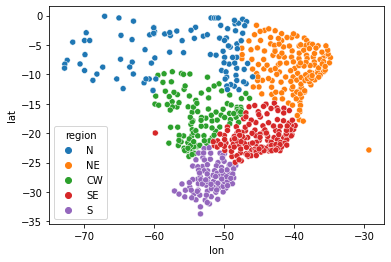

In [14]:
# Plot of gauges with color corresponding to region
import seaborn as sns
sns.scatterplot(x=df_w_gauge_locs.lon, y=df_w_gauge_locs.lat, hue=df_w_gauge_locs.region)

In [15]:
# Incorrect state or lon, lat label (gauge file only containing NaNs so wont affect analysis)
df_w_gauge_locs[(df_w_gauge_locs.lat<-19)&(df_w_gauge_locs.lon<-59)]

,filename,lon,lat,state,region,col,row
237,MG_S122_F_W59.82388888_S19.97999999.csv,-59.823889,-19.98,MG,SE,1740,1886
